In [1]:
#Task 1 
import numpy as np


beta = 1 / (1.4e-23 * 300)  
mu = 1.0  #chemical potential
epsilon = [1.0, 2.0]  #energy levels

Z = np.prod([1 + np.exp(-beta * (e - mu)) for e in epsilon])

#average occupation numbers
n_avg = [1 / (np.exp(beta * (e - mu)) + 1) for e in epsilon]

print("Grand Partition Function:", Z)
for i, n in enumerate(n_avg):
    print(f"Average Occupation Number for Level {i+1}: {n:.4f}")


Grand Partition Function: 2.0
Average Occupation Number for Level 1: 0.5000
Average Occupation Number for Level 2: 0.0000


/tmp/ipykernel_24521/2523481163.py:12: RuntimeWarning: overflow encountered in exp
  n_avg = [1 / (np.exp(beta * (e - mu)) + 1) for e in epsilon]


In [2]:
#Task 2 a 

#E=0 N=8, E= epsilon N = 7 

#Task 2 b 

import numpy as np
from scipy.special import comb


N = 15  #number of bosons
epsilon = 1.0  
beta = 1.0  


def canonical_partition_function(N, beta, epsilon):
    z = np.exp(-beta * epsilon)  
    Z_C = (1 + z) ** N  #binomial expansion
    return Z_C


def probability_of_microstate(N, n1, beta, epsilon):
    z = np.exp(-beta * epsilon)  
    Z_C = canonical_partition_function(N, beta, epsilon)  
    P = comb(N, n1) * z**n1 / Z_C  
    return P


Z_C = canonical_partition_function(N, beta, epsilon)
print(f"Canonical Partition Function Z_C: {Z_C:.4f}")

print("\nMicrostate probabilities:")
for n1 in range(N + 1):  # Iterate over possible values of n1
    P = probability_of_microstate(N, n1, beta, epsilon)
    print(f"P(E = {n1 * epsilon:.2f}) for n1 = {n1}: {P:.4f}")


Canonical Partition Function Z_C: 109.8291

Microstate probabilities:
P(E = 0.00) for n1 = 0: 0.0091
P(E = 1.00) for n1 = 1: 0.0502
P(E = 2.00) for n1 = 2: 0.1294
P(E = 3.00) for n1 = 3: 0.2063
P(E = 4.00) for n1 = 4: 0.2276
P(E = 5.00) for n1 = 5: 0.1842
P(E = 6.00) for n1 = 6: 0.1130
P(E = 7.00) for n1 = 7: 0.0534
P(E = 8.00) for n1 = 8: 0.0197
P(E = 9.00) for n1 = 9: 0.0056
P(E = 10.00) for n1 = 10: 0.0012
P(E = 11.00) for n1 = 11: 0.0002
P(E = 12.00) for n1 = 12: 0.0000
P(E = 13.00) for n1 = 13: 0.0000
P(E = 14.00) for n1 = 14: 0.0000
P(E = 15.00) for n1 = 15: 0.0000


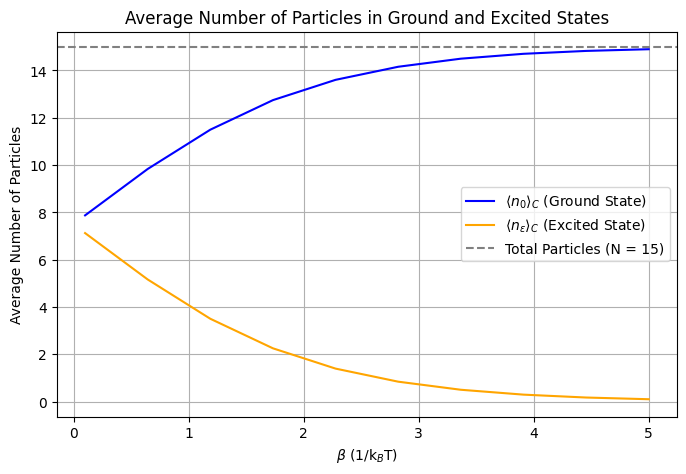

In [3]:
#Task 2 c 
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb


N = 15  #number of bosons
epsilon = 1.0  

def canonical_partition_function(N, beta, epsilon):
    z = np.exp(-beta * epsilon)  
    Z_C = (1 + z) ** N  #binomial expansion
    return Z_C


def probability_of_microstate(N, n1, beta, epsilon):
    z = np.exp(-beta * epsilon)  
    Z_C = canonical_partition_function(N, beta, epsilon)  
    P = comb(N, n1) * z**n1 / Z_C  
    return P

#average number of particles in ground and excited states
def average_particles(N, beta, epsilon):
    z = np.exp(-beta * epsilon)
    Z_C = canonical_partition_function(N, beta, epsilon)
    
    n0_avg = sum((N - n1) * probability_of_microstate(N, n1, beta, epsilon) for n1 in range(N + 1))
    nE_avg = N - n0_avg
    return n0_avg, nE_avg

beta_values = np.linspace(0.1, 5, 10)  

#computes averages for all beta values
n0_values = []
nE_values = []

for beta in beta_values:
    n0, nE = average_particles(N, beta, epsilon)
    n0_values.append(n0)
    nE_values.append(nE)


plt.figure(figsize=(8, 5))
plt.plot(beta_values, n0_values, label=r'$\langle n_0 \rangle_C$ (Ground State)', color='blue')
plt.plot(beta_values, nE_values, label=r'$\langle n_\epsilon \rangle_C$ (Excited State)', color='orange')
plt.axhline(N, color='gray', linestyle='--', label=f'Total Particles (N = {N})')
plt.xlabel(r'$\beta$ (1/k$_B$T)')
plt.ylabel('Average Number of Particles')
plt.title('Average Number of Particles in Ground and Excited States')
plt.legend()
plt.grid(True)
plt.show()


Quantum Partition Function Z: 1.5820

Microstate probabilities:
P(E = 0.00) for n_epsilon = 0: 0.6321
P(E = 1.00) for n_epsilon = 1: 0.2325
P(E = 2.00) for n_epsilon = 2: 0.0855
P(E = 3.00) for n_epsilon = 3: 0.0315
P(E = 4.00) for n_epsilon = 4: 0.0116
P(E = 5.00) for n_epsilon = 5: 0.0043
P(E = 6.00) for n_epsilon = 6: 0.0016
P(E = 7.00) for n_epsilon = 7: 0.0006
P(E = 8.00) for n_epsilon = 8: 0.0002
P(E = 9.00) for n_epsilon = 9: 0.0001
P(E = 10.00) for n_epsilon = 10: 0.0000
P(E = 11.00) for n_epsilon = 11: 0.0000
P(E = 12.00) for n_epsilon = 12: 0.0000
P(E = 13.00) for n_epsilon = 13: 0.0000
P(E = 14.00) for n_epsilon = 14: 0.0000
P(E = 15.00) for n_epsilon = 15: 0.0000


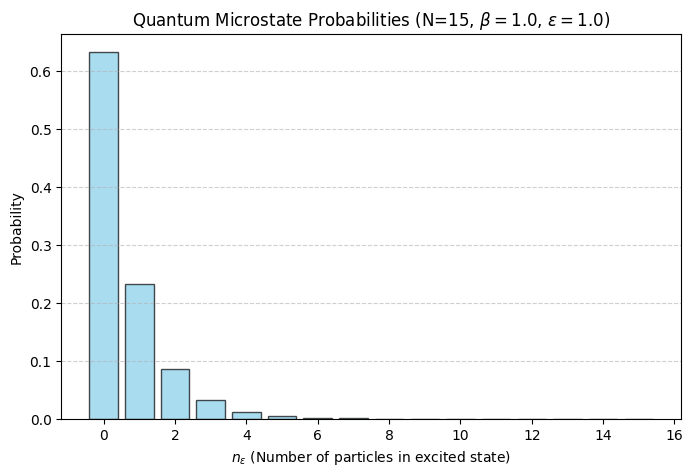

In [4]:
#Task 2 d 

import numpy as np
import matplotlib.pyplot as plt


N = 15  
epsilon = 1.0  
beta = 1.0  


def quantum_partition_function(N, beta, epsilon):
    z = np.exp(-beta * epsilon)  
    Z = (1 - z**(N + 1)) / (1 - z)  
    return Z

#probability of a microstate with energy E = n_epsilon * epsilon
def quantum_probability(N, n_epsilon, beta, epsilon):
    z = np.exp(-beta * epsilon)  
    Z = quantum_partition_function(N, beta, epsilon)  
    P = z**n_epsilon / Z
    return P


Z = quantum_partition_function(N, beta, epsilon)
print(f"Quantum Partition Function Z: {Z:.4f}")

print("\nMicrostate probabilities:")
for n_epsilon in range(N + 1):  # Iterate over possible values of n_epsilon
    P = quantum_probability(N, n_epsilon, beta, epsilon)
    print(f"P(E = {n_epsilon * epsilon:.2f}) for n_epsilon = {n_epsilon}: {P:.4f}")


n_epsilon_values = np.arange(N + 1)
probabilities = [quantum_probability(N, n, beta, epsilon) for n in n_epsilon_values]

plt.figure(figsize=(8, 5))
plt.bar(n_epsilon_values, probabilities, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel(r'$n_\epsilon$ (Number of particles in excited state)')
plt.ylabel('Probability')
plt.title(f'Quantum Microstate Probabilities (N={N}, $\\beta={beta}$, $\\epsilon={epsilon}$)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


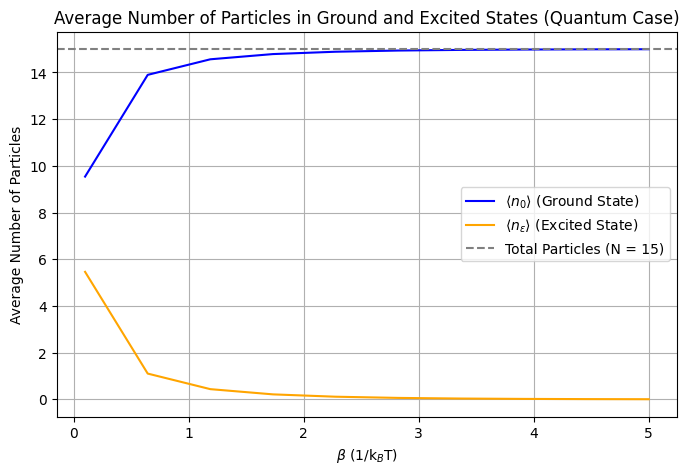

In [5]:
#Task 2 e 

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb


N = 15  
epsilon = 1.0  

def quantum_partition_function(N, beta, epsilon):
    z = np.exp(-beta * epsilon)  
    Z = (1 - z**(N + 1)) / (1 - z)  
    return Z

def quantum_probability(N, n_epsilon, beta, epsilon):
    z = np.exp(-beta * epsilon)  
    Z = quantum_partition_function(N, beta, epsilon)  
    P = z**n_epsilon / Z
    return P


def average_particles_quantum(N, beta, epsilon):
    z = np.exp(-beta * epsilon)
    Z = quantum_partition_function(N, beta, epsilon)
    
    
    n0_avg = sum((N - n_epsilon) * quantum_probability(N, n_epsilon, beta, epsilon) for n_epsilon in range(N + 1))
    nE_avg = N - n0_avg
    return n0_avg, nE_avg


beta_values = np.linspace(0.1, 5, 10) 


n0_values = []
nE_values = []

for beta in beta_values:
    n0, nE = average_particles_quantum(N, beta, epsilon)
    n0_values.append(n0)
    nE_values.append(nE)


plt.figure(figsize=(8, 5))
plt.plot(beta_values, n0_values, label=r'$\langle n_0 \rangle$ (Ground State)', color='blue')
plt.plot(beta_values, nE_values, label=r'$\langle n_\epsilon \rangle$ (Excited State)', color='orange')
plt.axhline(N, color='gray', linestyle='--', label=f'Total Particles (N = {N})')
plt.xlabel(r'$\beta$ (1/k$_B$T)')
plt.ylabel('Average Number of Particles')
plt.title('Average Number of Particles in Ground and Excited States (Quantum Case)')
plt.legend()
plt.grid(True)
plt.show()
